<a href="https://colab.research.google.com/github/ckalibsnelson/HackCville---Node-A/blob/master/03_Time_Series_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Visualizations
In this notebook we'll take some time series data and use it to create some visualizations!

Here's the link to the data used https://www.kaggle.com/selfishgene/historical-hourly-weather-data#humidity.csv

It's more than we've used in our other notebooks. Its suggested to just upload them one at a time because of this. 

In [0]:
# Imports 
import pandas as pd # pandas for dataframes
import numpy as np # numpy for calculations
import matplotlib.pyplot as plt # for visualization
from google.colab import files # For uploading data

from datetime import datetime # For converting strings to datetime objects

In [0]:
uploaded = files.upload()

Saving city_attributes.csv to city_attributes.csv
Saving humidity.csv to humidity.csv


## Reading in the data

In [0]:
df_attributes = pd.read_csv('city_attributes.csv')
df_hum = pd.read_csv('humidity.csv') # Change this to whatver file you're currently working with

In [0]:
# We see that city_attributes is simple information about the cities weather data was collected for
df_attributes.head()


,City,Country,Latitude,Longitude
0,Vancouver,Canada,49.249660,-123.119339
1,Portland,United States,45.523449,-122.676208
2,San Francisco,United States,37.774929,-122.419418
3,Seattle,United States,47.606209,-122.332069
4,Los Angeles,United States,34.052231,-118.243683


In [0]:
# Taking a glance at the data we get a general feel for it
df_hum.head()

# Note that the first row is all NaN as well

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN
1,2012-10-01 13:00:00,76.0,81.0,88.0,81.0,88.0,82.0,22.0,23.0,50.0,...,71.0,58.0,93.0,68.0,50.0,63.0,22.0,51.0,51.0,50.0
2,2012-10-01 14:00:00,76.0,80.0,87.0,80.0,88.0,81.0,21.0,23.0,49.0,...,70.0,57.0,91.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
3,2012-10-01 15:00:00,76.0,80.0,86.0,80.0,88.0,81.0,21.0,23.0,49.0,...,70.0,57.0,87.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
4,2012-10-01 16:00:00,77.0,80.0,85.0,79.0,88.0,81.0,21.0,23.0,49.0,...,69.0,57.0,84.0,68.0,52.0,62.0,22.0,51.0,51.0,50.0


## Cleaning The Data

In [0]:
# First we will rename the datetime column
# (The reason for this will become clear later on in this notebook)
df_hum.rename({'datetime':'datetime_str'}, axis=1, inplace=True)

In [0]:
# Lets see what type each column is and how many of them are non-null i.e actually exist
df_hum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45253 entries, 0 to 45252
Data columns (total 37 columns):
datetime_str         45253 non-null object
Vancouver            43427 non-null float64
Portland             44804 non-null float64
San Francisco        44311 non-null float64
Seattle              44964 non-null float64
Los Angeles          45101 non-null float64
San Diego            44909 non-null float64
Las Vegas            44411 non-null float64
Phoenix              43945 non-null float64
Albuquerque          44543 non-null float64
Denver               43445 non-null float64
San Antonio          44689 non-null float64
Dallas               44934 non-null float64
Houston              45132 non-null float64
Kansas City          44741 non-null float64
Minneapolis          44743 non-null float64
Saint Louis          43964 non-null float64
Chicago              44144 non-null float64
Nashville            44686 non-null float64
Indianapolis         44558 non-null float64
Atlanta     

### Filling NaNs
We see that there are a lot of values missing from this table. It may be challenging/misleading to plot our data with the NaN values present. 

We will try a couple different strategies for handling these NaN values and see how each will effect our data and plots. 

In [0]:
# replaces all NaN values with 0
df_hum_zero = df_hum.fillna(value=0)
# df_hum_zero.info()

In [0]:
# ffill will fill NaN values with the non NaN value that comes before it
df_hum_ffill = df_hum.fillna(method='ffill')


We see that when using ffill we end up with one less NaN value in every column but DateTime. This is because the first row in DataFrame is NaN for all locations. Thus there is no value preceding that could be used to fill it.

This isn't a problem in the fill with zero case as any NaN value just has a zero plugged in

Other fill methods can be found here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html


### Converting date strings to datetime objects

In [0]:
print("Value[0, 0]: '" + str(df_hum_zero.iloc[0,0]) + "' Type: " + str(type(df_hum_zero.iloc[0,0])))
print("Value[0, 0]: '" + str(df_hum_ffill.iloc[0,0]) + "' Type: " + str(type(df_hum_ffill.iloc[0,0])))

Value[0, 0]: '2012-10-01 12:00:00' Type: <class 'str'>
Value[0, 0]: '2012-10-01 12:00:00' Type: <class 'str'>


Python plotting libraries aren't able to plot these date strings directly. However, if we first convert them to datetime objects, they will be easily plottable and we can get the visulizations we want. 

This means we will have to **apply** some function to each string in the datetime column

In [0]:
df_hum.head()

,datetime_str,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN
1,2012-10-01 13:00:00,76.0,81.0,88.0,81.0,88.0,82.0,22.0,23.0,50.0,...,71.0,58.0,93.0,68.0,50.0,63.0,22.0,51.0,51.0,50.0
2,2012-10-01 14:00:00,76.0,80.0,87.0,80.0,88.0,81.0,21.0,23.0,49.0,...,70.0,57.0,91.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
3,2012-10-01 15:00:00,76.0,80.0,86.0,80.0,88.0,81.0,21.0,23.0,49.0,...,70.0,57.0,87.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
4,2012-10-01 16:00:00,77.0,80.0,85.0,79.0,88.0,81.0,21.0,23.0,49.0,...,69.0,57.0,84.0,68.0,52.0,62.0,22.0,51.0,51.0,50.0


The way to convert datetime objects is extremely convenient. But it's also not easy as the formatting strings to make these conversions are pretty far from intuitive. The one below can be read as 'Year (dash) month (dash) day (dash) time of day'. Most of that would be hard to get just reading it. 

This link has a very helpful table for creating and understanding these strings: https://docs.python.org/3/library/datetime.html#datetime.datetime.strptime

If you CTRL + F %d (or any of the other % character combinations below) you should find the chart saying what each one means. Whenever you want to make you're own datetime formatting string it would be easiest to use this chart. 

In [0]:
# Option 1: Predefining a function
def toDatetime(date):
  return datetime.strptime(date, '%Y-%m-%d %X')

df_hum['datetime'] = df_hum['datetime_str'].apply(toDatetime)

In [0]:
# Option 2: Creating a lambda function
df_hum['datetime'] = df_hum['datetime_str'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %X'))

In [0]:
# Option 3: Using built in pandas functionality
df_hum['datetime'] = pd.to_datetime(df_hum['datetime_str'], format='%Y-%m-%d %X') 

In [0]:
# df_hum.head()

#### When should you use a lambda function and when should you define a function? 

Usually, it is best to define a lambda function for a quick and easy function that you're only going to use once. 

If you're going to repeatedly use the function it is worth the extra overhead to create an actual function. 

So, in this case, since we have to apply the same function to df_hum, df_hum_zero, and df_hum_ffill it will probably be worth it to go the extra step and create the actual function. 

That is, if pandas didn't already have the functionality built in as is. In reality it would probably be easiest just to use pd.to_datetime in this scenario. Looking at the other options is good practice for problems in the future that pandas won't have a direct fix for. 

In [0]:
df_hum_ffill['datetime'] = pd.to_datetime(df_hum_ffill['datetime_str'], format='%Y-%m-%d %X')
df_hum_zero['datetime'] = pd.to_datetime(df_hum_zero['datetime_str'], format='%Y-%m-%d %X')

## Plotting the Data

In [0]:
len(df_hum['Philadelphia'][df_hum['Philadelphia'].isna()])

624

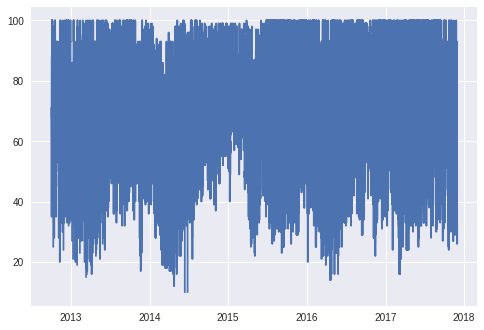

In [0]:
plt.plot(df_hum['datetime'], df_hum['Philadelphia'])
plt.show()

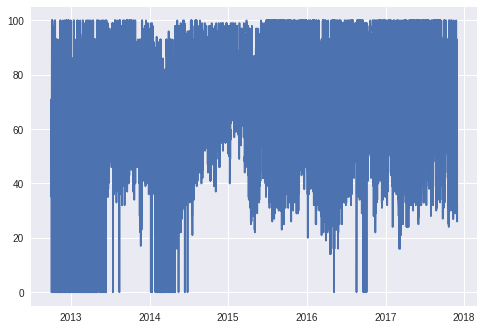

In [0]:
plt.plot(df_hum_zero['datetime'], df_hum_zero['Philadelphia'])

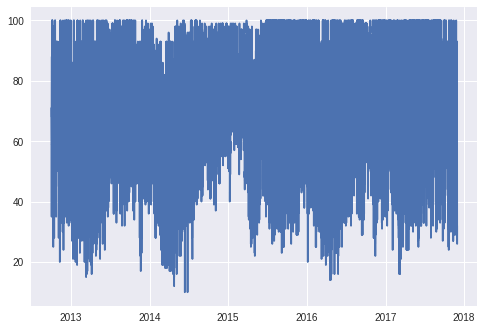

In [0]:
plt.plot(df_hum_ffill['datetime'], df_hum_ffill['Philadelphia'])

These plots really show nothing about the data itself. 

But, it does tell us a few things about our strategies for handling NaN values. Since the original dataframe's columns did produce a plot, then something must have happend to the NaN values (we see above that there are over 600 NaN values in that column). It is most likely ignoring any NaN value and just moving onto the next value. It also shows that filling NaNs with 0s leads to some weird stuff as the graph will just shoot to zero randomly. 

So, in this case, it is probably best to either forward/backward fill or ignore the NaN values. From here on we'll stick to the forward filled dataframe

### Making the Plots better
How the graphs stand right now there is **a lot** of room for improvement. 

For one, it is almost impossible to see anything because of how many datapoints there are. Thus, we could try condensing the plot to just one year and see what that looks like.

In [0]:
# Lets try and get just data from 2017
# We'll use another lambda function to accomplish this
df_hum_ffill_2017 = df_hum_ffill[df_hum_ffill['datetime'].apply(lambda x: x.year == 2017)].copy()

# We add .copy() so changes we make to this dataframe will not effect changes we make to the original

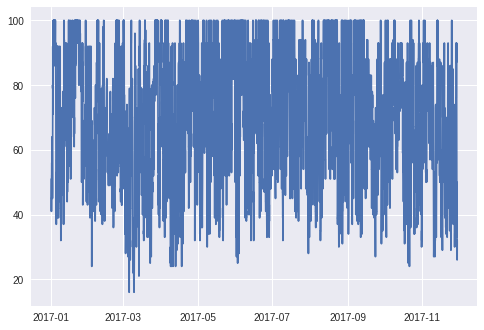

In [0]:
# Now lets plot it
plt.plot(df_hum_ffill_2017['datetime'], df_hum_ffill_2017['Philadelphia'])
plt.show()

We see that this is a little bit better but, it's still to hard to get anything out of the graph because of how many points there are. 

Next, we could try to plot a single datapoint for the mean of each day rather than plot a datpoint for every hour in the day. 
If that is still to dense, we could try and plot a single datapoint with the mean for each week. 

#### 1: Plotting a single point per day

In [0]:
# First, we'll have to create a new column for Year-Month-Day
df_hum_ffill_2017['Y-M-D'] = df_hum_ffill_2017['datetime'].apply(lambda date: datetime(date.year, date.month, date.day))
df_hum_ffill_2017.head()

,datetime_str,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem,datetime,Y-M-D
37260,2017-01-01 00:00:00,100.0,96.0,81.0,93.0,81.0,87.0,71.0,77.0,75.0,...,85.0,81.0,96.0,76.0,100.0,100.0,100.0,76.0,2017-01-01 00:00:00,2017-01-01
37261,2017-01-01 01:00:00,100.0,96.0,62.0,93.0,76.0,93.0,81.0,77.0,81.0,...,85.0,81.0,96.0,81.0,100.0,100.0,100.0,81.0,2017-01-01 01:00:00,2017-01-01
37262,2017-01-01 02:00:00,100.0,99.0,75.0,93.0,87.0,87.0,81.0,77.0,81.0,...,92.0,81.0,94.0,87.0,100.0,100.0,100.0,87.0,2017-01-01 02:00:00,2017-01-01
37263,2017-01-01 03:00:00,100.0,99.0,76.0,93.0,81.0,82.0,81.0,100.0,79.0,...,92.0,81.0,94.0,87.0,100.0,100.0,100.0,87.0,2017-01-01 03:00:00,2017-01-01
37264,2017-01-01 04:00:00,100.0,99.0,93.0,93.0,93.0,81.0,81.0,100.0,79.0,...,85.0,81.0,94.0,87.0,50.0,100.0,100.0,87.0,2017-01-01 04:00:00,2017-01-01


In [0]:
# We know have the average for every day in a dataframe with the index
# as the month and day
day_means_2017 = df_hum_ffill_2017.groupby('Y-M-D').mean()
# We reset this index so we can use it or plotting
day_means_2017.reset_index(inplace=True)

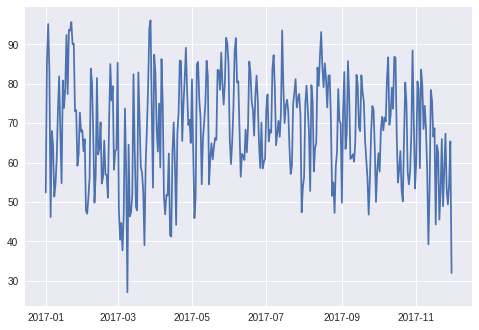

In [0]:
plt.plot(day_means_2017['Y-M-D'], day_means_2017['Philadelphia'])
plt.show()

This looks a lot better! We can now sort of see all the fluctuations in the data over time. However, it is still a little bit scattered so we can take the final step and take weekly averages to see what we can find.  

#### 2: Plotting a single point per week (mean of the week)

In [0]:
df_hum_ffill_2017['Week_Num'] = df_hum_ffill_2017['Y-M-D'].apply(lambda x: x.strftime('%W'))

In [0]:
week_mean_2017 = df_hum_ffill_2017.groupby('Week_Num').mean()
week_mean_2017.reset_index(inplace=True)

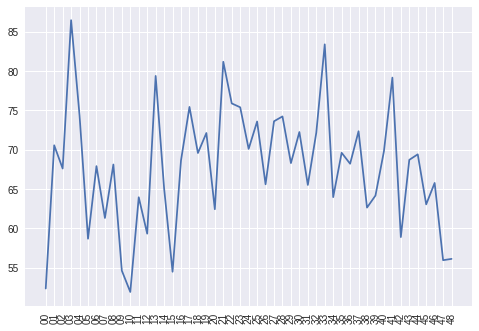

In [0]:
plt.plot(week_mean_2017['Week_Num'], week_mean_2017['Philadelphia'])
plt.xticks(rotation='vertical')
plt.show()

## Exercises
Make a similar plot for a another weather data point. 
Make this one more visually appealling.

-  Could add better labels

-  Could change the colors

-  Could Add multiple cities to one plot

-   etc

# Making It Look Better

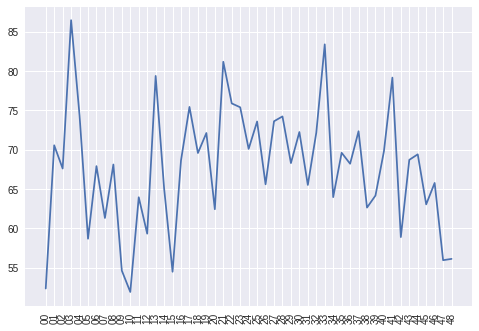

In [0]:
phil_plot = plt.plot(week_mean_2017['Week_Num'], week_mean_2017['Philadelphia'])
plt.xticks(rotation='vertical')
plt.show()

The x-axis is a little cluttered, maybe we can remove some of the week numbers so it's a little cleaner. 

In [0]:
x_ticks = list(week_mean_2017['Week_Num'])[0:-1:5]

# Python Note: 
# This last part [0:-1:5] is slicing
# Slicing allows you to take a subset of a list. 
# It is of the form [first value: last value] or [first value: last value: nth value]
# nth value means you'll take every n values from the array. In our case we take 
# every 5th value. 
# It seems a little weird too that the last value is -1. 
# This is because python indexing 'wraps around' in a sense. 
# Negative numbers will represent values from the end of the list -1 being the
# last value in the list, -2 being the second to last. 

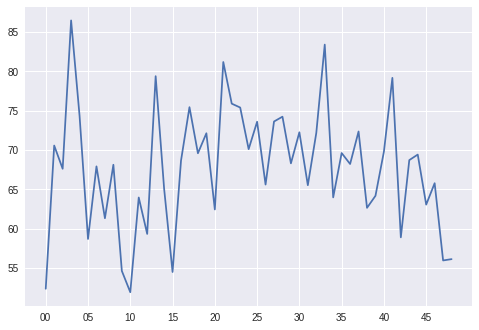

In [0]:
plt.plot(week_mean_2017['Week_Num'], week_mean_2017['Philadelphia'])
plt.xticks(ticks=x_ticks)
plt.show()

Now that we have a little more space, we can make it easier to tell what '00' or '35' means. We can add week to each to show that it's a week number. 

In [0]:
x_tick_labels = ["Week " + week_num for week_num in x_ticks]

# Python Note: 
# The code in between the brackets is whats called list comprehension
# Really, its kind of like a simplified apply function. 
# It's a way to loop over a list of values all in one line of code
# and perform some action on each item placing the result in a new list. 
# In this case, we loop over every value in the list and add the string
# "Week" to the front of it. 

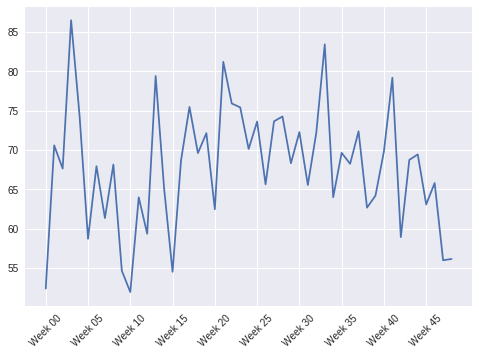

In [0]:
plt.plot(week_mean_2017['Week_Num'], week_mean_2017['Philadelphia'])
# We rotate the text by 45 degrees so that the x_tick labels are more readable
plt.xticks(rotation = 45, ticks=x_ticks, labels=x_tick_labels)
plt.show()

Now it's a little hard to tell what the y-axis is plotting. We should add some sort of label so it's more easy to tell wha'ts being plotted. 

In [0]:
plt.plot(week_mean_2017['Week_Num'], week_mean_2017['Philadelphia'])


# We rotate the text by 45 degrees so that the x_tick labels are more readable
plt.xticks(rotation = 45, ticks=x_ticks, labels=x_tick_labels)

# Making a set of attributes for the axis label 
font_attr = dict(fontweight='bold', fontsize=20)
plt.ylabel("Humidity", fontdict=font_attr)
plt.show()

NameError: ignored

You can now pretty easily see what the axes mean in the plot. How about we add a title to the entire graph. 

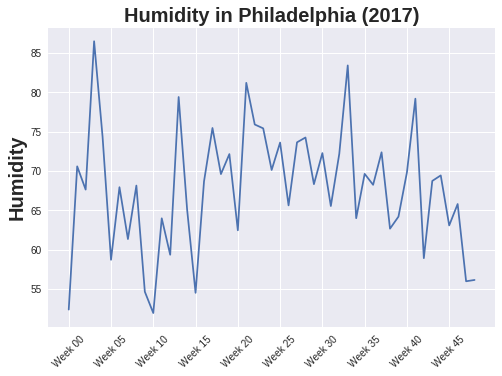

In [0]:
plt.plot(week_mean_2017['Week_Num'], week_mean_2017['Philadelphia'])
plt.xticks(rotation = 45, ticks=x_ticks, labels=x_tick_labels)
plt.ylabel("Humidity", fontdict=font_attr)

# Adding the title
plt.title("Humidity in Philadelphia (2017)", fontdict=font_attr)
plt.show()